# DAV 5400 Spring 2019 Project 2 - Avocado analysis

Adva Asraf 
<br>
Olga Kriyokov

***
Introduction:
We chose to make analyze Avocado prices and to dissect our research question as followed:

How have the avocado prices fluctuated throughout the years? Both organic and conventional types 

Data Source: 
https://www.kaggle.com/neuromusic/avocado-prices
(This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV)

Exploratory Data Analysis (EDA):

This data represent data on avocado prices in multiple US markets.
This data set is a weekly retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Data contains: 13 attributes and 18,249 use cases

Date - the date of the observation (Numerical)

Average Price - the average price per unit (even when multiple avocados are sold in bags)

Type - conventional or organic

Year - the year

Region - the city or region of the observation

Total Volume - total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


*The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Attributes analysis: 

Date - categorical/ordinal

Average Price - Numeric continuous data

type - categorical nominal variable

year - categorical/ordinal

Region - categorical data

Total Volume - numeric continuous data

Total Bags - numeric continuous data

Small Bags - numeric continuous data

Large Bags - numeric continuous data

XLarge Bags - numeric continuous data

4046 - categorical nominal data

4225 - categorical nominal data

4770 - categorical nominal data



In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter("ignore") 
# HAd some warnings, that didn't had any meaning. Solve it by using this link
#https://stackoverflow.com/questions/3920502/how-to-suppress-a-third-party-warning-using-warnings-filterwarnings

In [14]:
#Loading Dataset

filename = (r"C:\Users\Olga Kriyokov\Documents\GitHub\DAV-54000/avocado.csv")
df=pd.read_csv(filename)
df['Date']=pd.to_datetime(df['Date'])
del df['Unnamed: 0']

#df=pd.read_csv('avocado.csv')
#df['Date']=pd.to_datetime(df['Date'])
#del df['Unnamed: 0']

In [4]:
#Top Rows - display the structure of the data
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
#Rows and Columns
df.shape

(18249, 13)

# Exploratory Data Analysis (EDA) - a summary statistics for each attribute with appropriate graphical analysis using both Matplotlib and Seaborn. 

## 1. Average Price

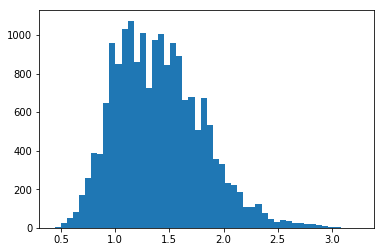

In [6]:
#Matplotlib
plt.hist(df.AveragePrice,bins=50)
plt.show()

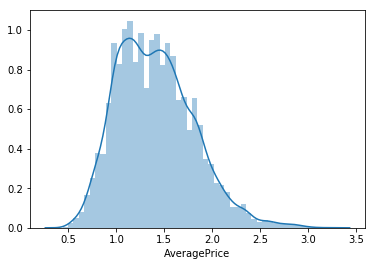

In [7]:
#Seaborn
sns.distplot(df.AveragePrice)
plt.show()

We chose to present the average price using histogram since this is continuous data attribute. As you can see, the average price of avocado is around 1.4 and the price distribution is seen in the above graphs. The distribution is close to normal. So throughtout the years the price was between 0.5 to 3.0

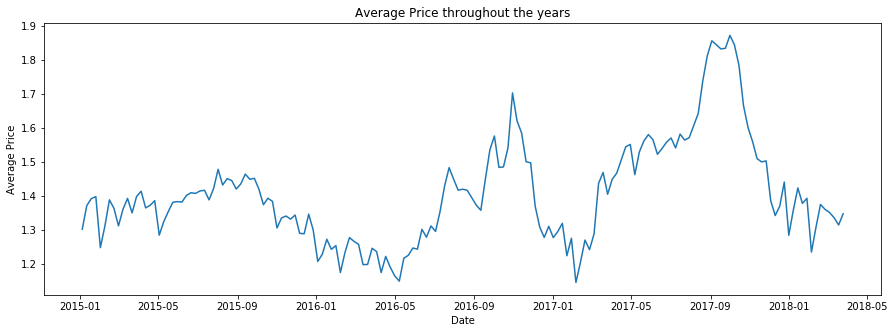

In [8]:
#Matplotlib
tempdf=df.copy()
tempdf=tempdf.groupby('Date')['AveragePrice'].mean().reset_index()
tempdf['Date']=pd.to_datetime(tempdf.Date)
tempdf=tempdf.sort_values(by='Date')
plt.figure(figsize=(15,5))
plt.title("Average Price throughout the years")
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.plot(tempdf.Date.values,tempdf.AveragePrice.values)
plt.show()

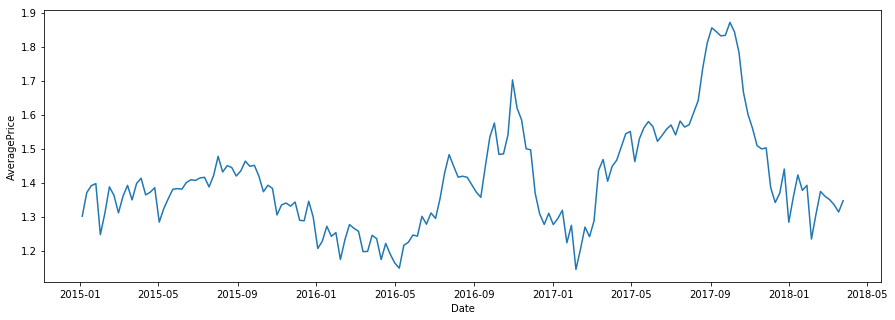

In [9]:
#Seaborn
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='AveragePrice',data=tempdf)
plt.show()

We chose to use line charts in order to present the price fluctuation; the charts can present the price trends in different time periods. By looking at the plots above, it is easy do deduce that there were fluctuation throughout the years, and the highest price ever was in 2017-09. You also can see some low points on 2016-05 and on 2017-02

# Total Volume

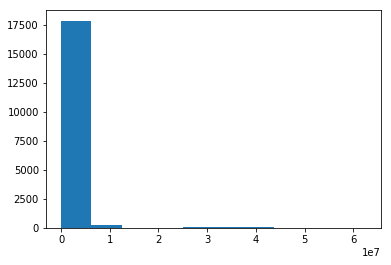

In [10]:
#Matplotlib
plt.hist(df['Total Volume'])
plt.show()

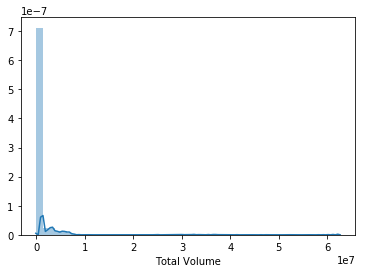

In [57]:
#Seaborn
sns.distplot(df['Total Volume'])
plt.show()

This distribution shows the total number of avocados sold in the whole data. As you can deduce, the highest number was more than a 17,500 avocado's. 
In the next graph, we will present also the total number throughout the years using both libraries.

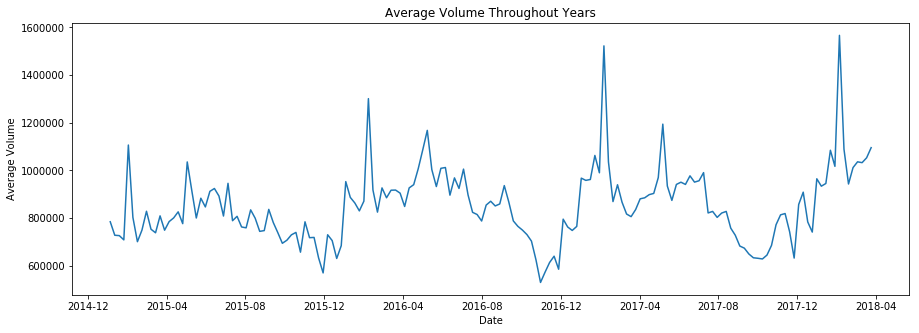

In [58]:
#Matplotlib
tempdf=df.copy()
tempdf=tempdf.groupby('Date')['Total Volume'].mean().reset_index()
tempdf['Date']=pd.to_datetime(tempdf.Date)
tempdf=tempdf.sort_values(by='Date')
plt.figure(figsize=(15,5))
plt.title("Average Volume Throughout Years")
plt.xlabel('Date')
plt.ylabel('Average Volume')
plt.plot(tempdf.Date.values,tempdf['Total Volume'])
plt.show()

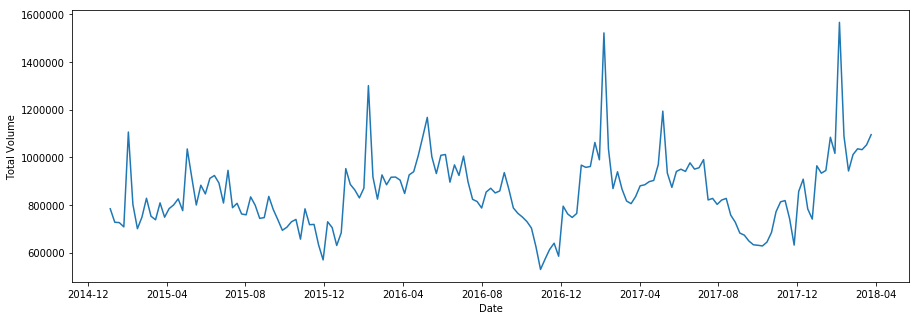

In [59]:
#Seaborn
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Total Volume',data=tempdf)
plt.show()

As you can see and deduce, there was a fluctuation in total number of avocados sold. Total volume fluctuated a lot and especially after January 2017, where there has been a greater demand. 
You can also see some low points on 2016-12 and on 2015-12. You can see that the average price on the graphs above, shows that the price on 2016-11 was high near $1.7 per unit. That might explain the low demand.

# 4046 (Total number of avocados with PLU 4046 sold)

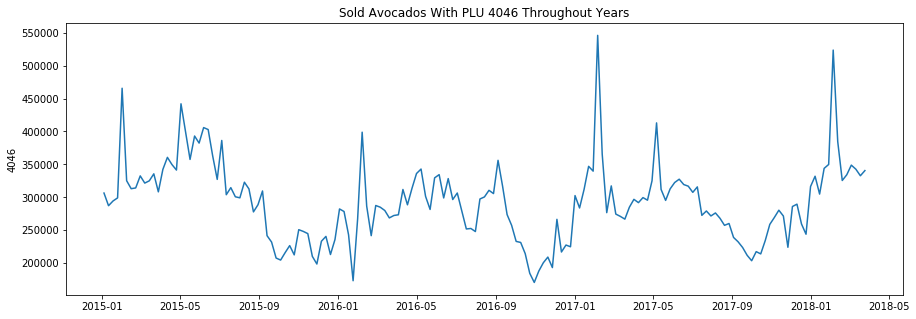

In [18]:
#Matplotlib
tempdf=df.copy()
tempdf=tempdf.groupby('Date')['4046'].mean().reset_index()
tempdf['Date']=pd.to_datetime(tempdf.Date)
tempdf=tempdf.sort_values(by='Date')
plt.figure(figsize=(15,5))
plt.title("Sold Avocados With PLU 4046 Throughout Years")
plt.ylabel('4046')
plt.plot(tempdf.Date.values,tempdf['4046'])
plt.show()

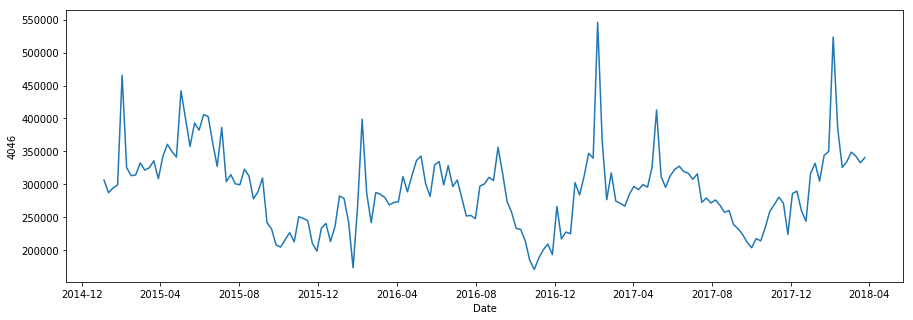

In [61]:
#Seaborn
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='4046',data=tempdf)
plt.show()

PLU 4046 Sold Throughout years had most demand after 2017-01

# 4225 (Total number of avocados with PLU 4225 sold)

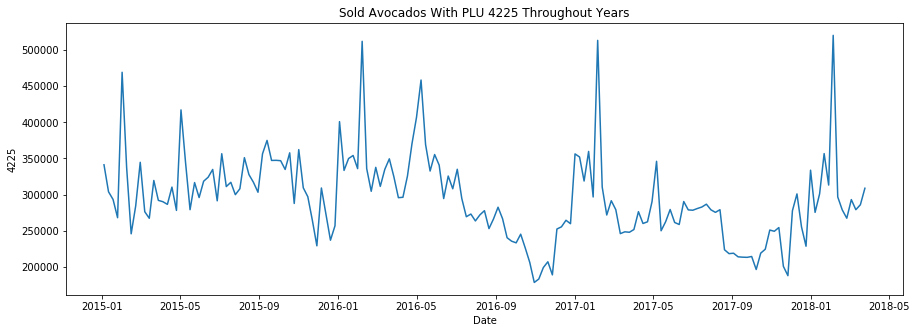

In [19]:
#Matplotlib
tempdf=df.copy()
tempdf=tempdf.groupby('Date')['4225'].mean().reset_index()
tempdf['Date']=pd.to_datetime(tempdf.Date)
tempdf=tempdf.sort_values(by='Date')
plt.figure(figsize=(15,5))
plt.title("Sold Avocados With PLU 4225 Throughout Years")
plt.xlabel('Date')
plt.ylabel('4225')
plt.plot(tempdf.Date.values,tempdf['4225'])
plt.show()

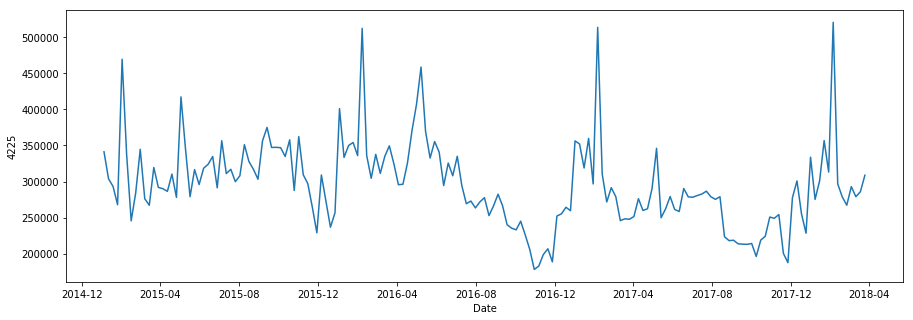

In [63]:
#Seaborn
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='4225',data=tempdf)
plt.show()

The price flucutation of 4225 was more than others, It had a lot of demand on 2016-01 too while 4046 did not had as much on that time. You can see that 4225 had 4 main picks on the prices. the lowest drop point was on 2016-11, 2016-12 and 2017-12

# 4770 (Total number of avocados with PLU 4770 sold)

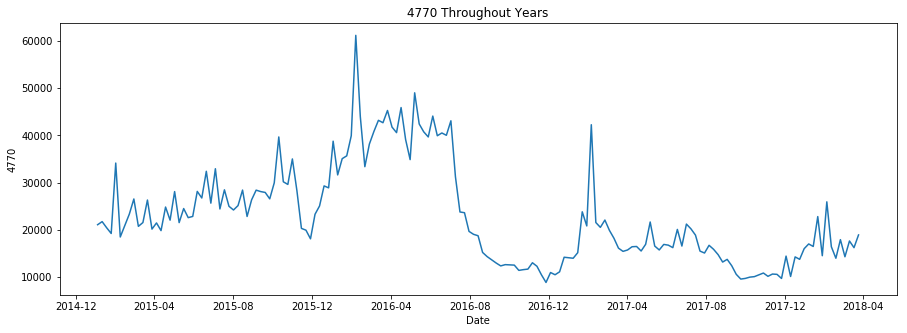

In [64]:
#Matplotlib
tempdf=df.copy()
tempdf=tempdf.groupby('Date')['4770'].mean().reset_index()
tempdf['Date']=pd.to_datetime(tempdf.Date)
tempdf=tempdf.sort_values(by='Date')
plt.figure(figsize=(15,5))
plt.title("Sold Avocados With PLU 4770 Throughout Years")
plt.xlabel('Date')
plt.ylabel('4770')
plt.plot(tempdf.Date.values,tempdf['4770'])
plt.show()

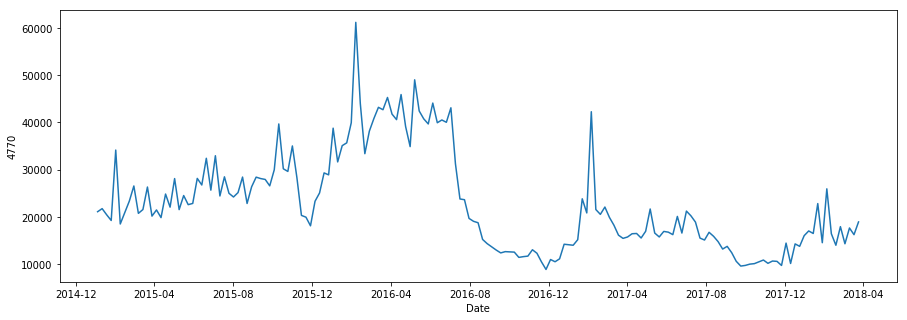

In [65]:
#Seaborn
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='4770',data=tempdf)
plt.show()

The sales of 4770 were very different. It had peaked after 2016-01 and after that there was a steep downward trend. Between 2016-07 to 2016-01, there was a constant decrease in sold avocados with this PLU

# Plotting 4770,4026,4225

<Figure size 1440x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

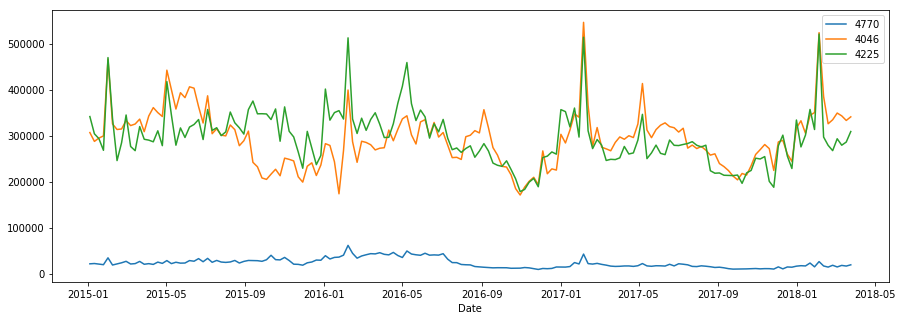

In [22]:
#Matplotlib
tempdf=df.copy()
tempdf=tempdf.groupby('Date')['4770','4046','4225'].mean().reset_index()
tempdf['Date']=pd.to_datetime(tempdf.Date)
tempdf=tempdf.sort_values(by='Date')
plt.figure(figsize=(15,5))
plt.xlabel('Date')
plt.plot(tempdf.Date.values,tempdf['4770'],label='4770')
plt.plot(tempdf.Date.values,tempdf['4046'],label='4046')
plt.plot(tempdf.Date.values,tempdf['4225'],label='4225')
plt.legend()
plt.show()

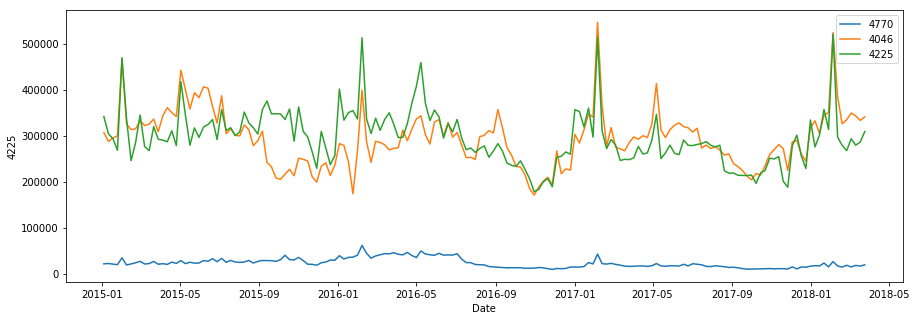

In [23]:
#Seaborn
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='4770',data=tempdf,label='4770')
sns.lineplot(x='Date',y='4046',data=tempdf,label='4046')
sns.lineplot(x='Date',y='4225',data=tempdf,label='4225')
plt.show()

In this line chart, you can see all PLU's combined. By presenting all PLU's in one chart. The reader will be able to distinguish between the different types, see the trends of all 3 together and deduce conclusions like: 4770 has lowest sales while others were mostly similar ( between 200,00 to 550,000 units)

# Total Bags

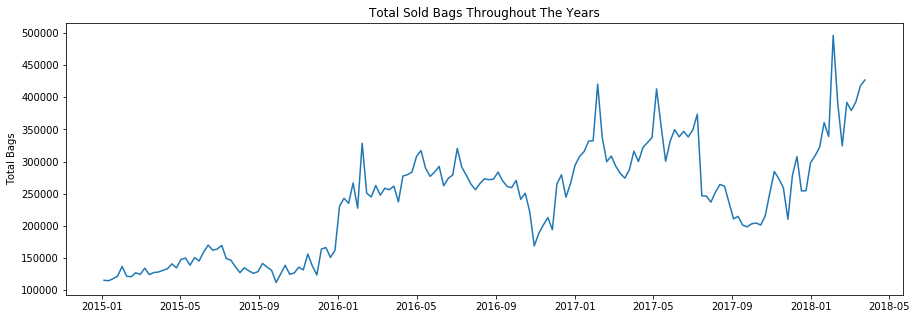

In [24]:
#Matplotlib
tempdf=df.copy()
tempdf=tempdf.groupby('Date')['Total Bags'].mean().reset_index()
tempdf['Date']=pd.to_datetime(tempdf.Date)
tempdf=tempdf.sort_values(by='Date')
plt.figure(figsize=(15,5))
plt.title("Total Sold Bags Throughout The Years")
plt.ylabel('Total Bags')
plt.plot(tempdf.Date.values,tempdf['Total Bags'])
plt.show()

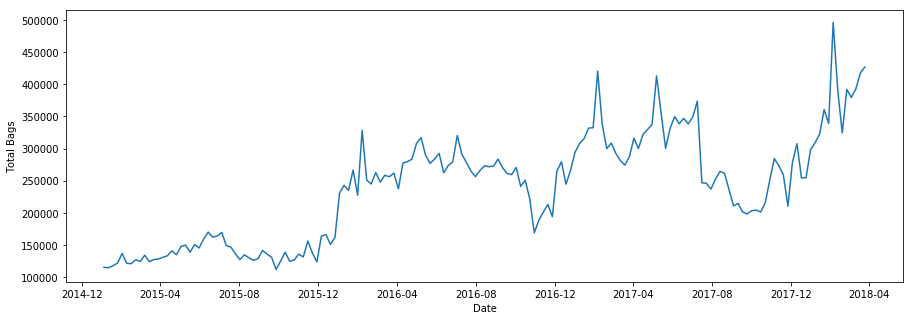

In [76]:
#Seaborn
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Total Bags',data=tempdf)
plt.show()

The total bags has almost an upward trend with some variations

# Small and Large Bags

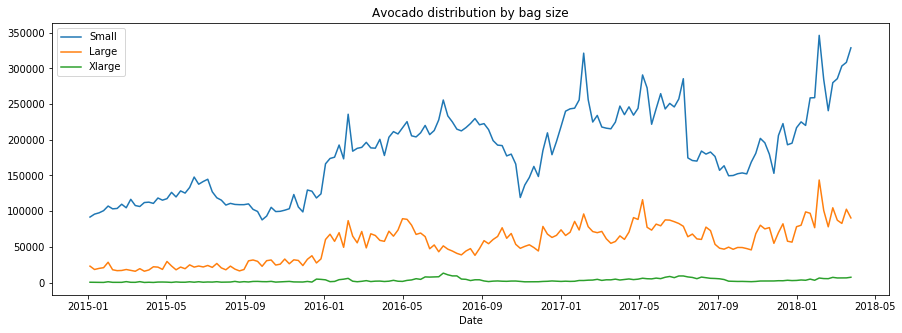

In [26]:
#Matplotlib
tempdf=df.copy()
tempdf=tempdf.groupby('Date')['Small Bags','Large Bags','XLarge Bags'].mean().reset_index()
tempdf['Date']=pd.to_datetime(tempdf.Date)
tempdf=tempdf.sort_values(by='Date')
plt.figure(figsize=(15,5))
plt.title("Avocado distribution by bag size")
plt.xlabel('Date')
plt.plot(tempdf.Date.values,tempdf['Small Bags'],label='Small')
plt.plot(tempdf.Date.values,tempdf['Large Bags'],label='Large')
plt.plot(tempdf.Date.values,tempdf['XLarge Bags'],label='Xlarge')
plt.legend()
plt.show()

In this chart, we presented the total Small, large and extra large sold avocado bags. As you can see, the bags that have most sales are small avocado bags, then Large and then lastly XLarge bags. All 3 lines have varying trends with picks and low points. It seems that small and large bags have very close tendentiousness, having icks and low points almost at the same time. 

# Type and Year

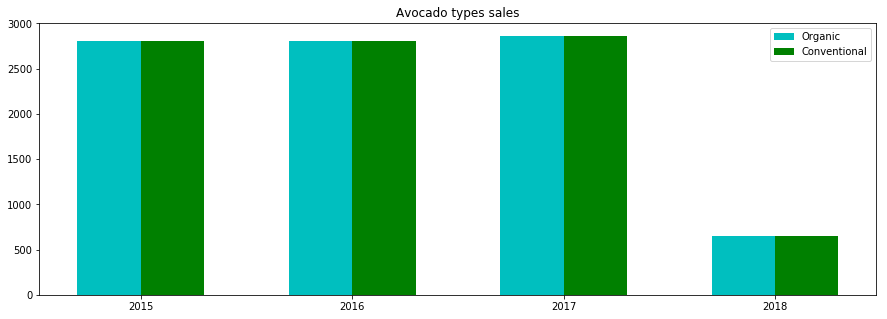

In [34]:
#Matplotlib
tempdf=df.copy()
tempdf=tempdf.groupby('year')['type'].value_counts()
tempdf=pd.DataFrame(tempdf)
tempdf.columns=['count']
tempdf=tempdf.reset_index()
t1=tempdf[tempdf.type=='organic']
t2=tempdf[tempdf.type!='organic']


#Plotting
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
w = 0.3
ax.bar(t1['year'], t1['count'],width=w,color='c',align='center',label='Organic')
ax.bar(t2['year']+0.3, t2['count'],width=w,color='g',align='center',label='Conventional')
ax.set_xticks(t1.year+ w / 2)
ax.set_xticklabels( ('2015', '2016', '2017', '2018') )
plt.title("Avocado types sales")
plt.legend()
plt.show()

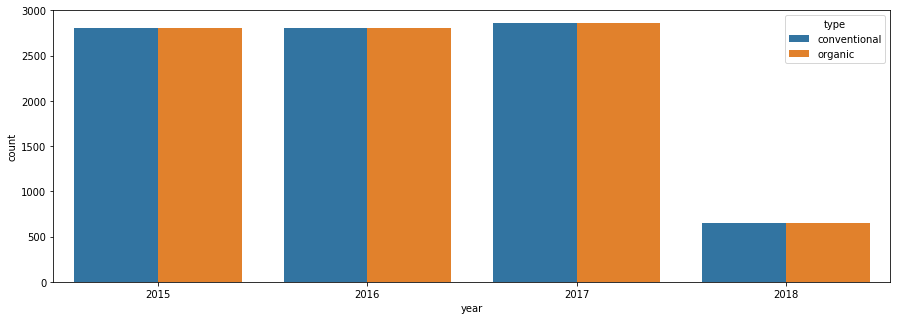

In [31]:
#Seaborn
plt.figure(figsize=(15,5))
sns.countplot(x='year',hue='type',data=df)
plt.show()

By analyzing the chart, it seems that sales of organic and conventional are very close. Also, both sales decreased in 2018 from more than a 2500 to less than a 1000.

# Region and Average Price (Organic)

In [35]:
random=['Detroit', 'Plains', 'Houston']
tempdf=df.copy()
tempdf=tempdf[tempdf.type=='organic']
tempdf=tempdf[tempdf.region.isin(random)]

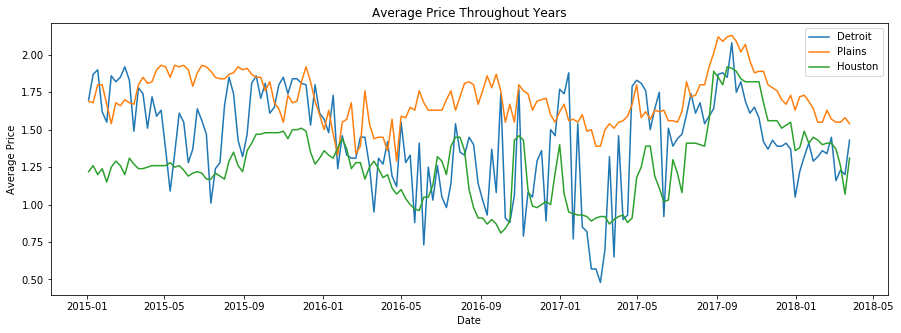

In [36]:
#Matplotlib
plt.figure(figsize=(15,5))
plt.title("Average Price Throughout Years")
plt.xlabel('Date')
plt.ylabel('Average Price')
for c in random:
    t=tempdf.loc[tempdf.region==c,:]
    t=t.sort_values('Date')
    plt.plot(t.Date.values,t.AveragePrice.values,label=c)
plt.legend()
plt.show()

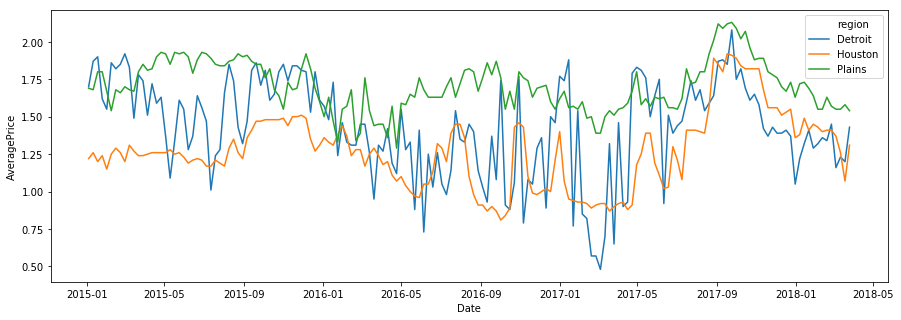

In [37]:
#Seaborn
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='AveragePrice',hue='region',data=tempdf)
plt.show()

These are plots of random 3 regions sales throughout the years (Organic only)

# RESEARCH QUESTION: How have the avocado prices fluctuated throughout the years ? Both organic and conventional 

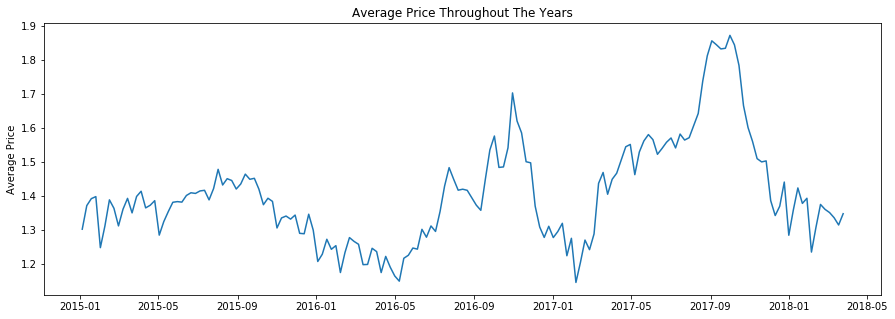

In [50]:
#Matplotlib
tempdf=df.copy()
tempdf=tempdf.groupby('Date')['AveragePrice'].mean().reset_index()
tempdf['Date']=pd.to_datetime(tempdf.Date)
tempdf=tempdf.sort_values(by='Date')
plt.figure(figsize=(15,5))
plt.title("Average Price Throughout The Years")
plt.ylabel('Average Price')
plt.plot(tempdf.Date.values,tempdf.AveragePrice.values)
plt.show()

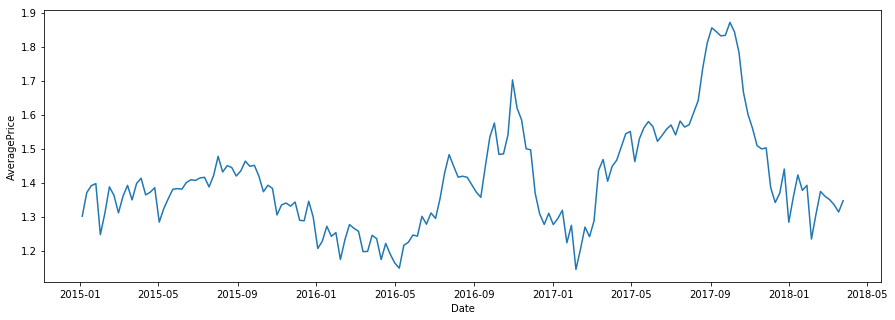

In [39]:
#Seaborn
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='AveragePrice',data=tempdf)
plt.show()

The above two graphs show the average price fluctuation regardless if it is organic or not. As you can deduce, it did fluctuated throughout the years and had some peaks and downfalls. Highest Peak was after 2017-09

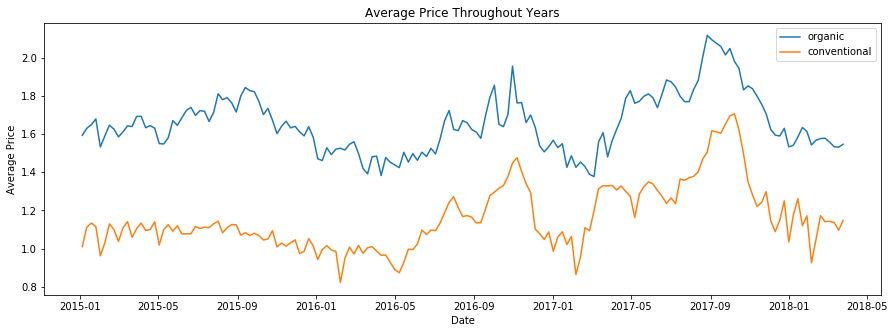

In [40]:
#Matplotlib
tempdf=df.copy()
tempdf=tempdf.groupby(['Date','type'])['AveragePrice'].mean().reset_index()
tempdf['Date']=pd.to_datetime(tempdf.Date)

t1=tempdf[tempdf.type=='organic']
t1=t1.sort_values(by='Date')
t2=tempdf[tempdf.type!='organic']
t2=t2.sort_values(by='Date')

plt.figure(figsize=(15,5))
plt.title("Average Price Throughout Years")
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.plot(t1.Date.values,t1.AveragePrice.values,label='organic')
plt.plot(t2.Date.values,t2.AveragePrice.values,label='conventional')
plt.legend()
plt.show()

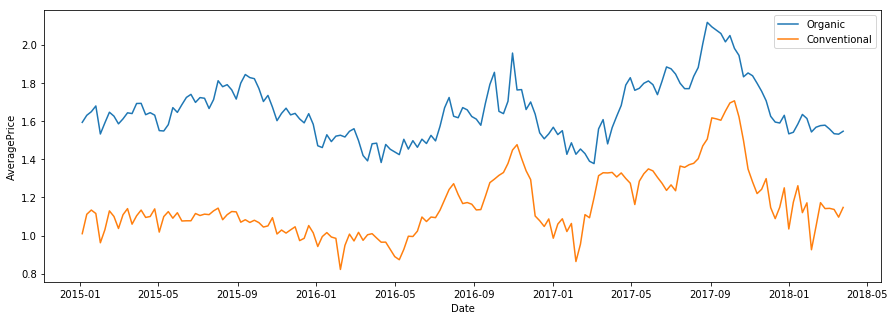

In [41]:
#Seaborn
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='AveragePrice',data=t1,label='Organic')
sns.lineplot(x='Date',y='AveragePrice',data=t2,label='Conventional')
plt.show()

After we have divided and plotted organic and conventional separately, now we can see that the average price of conventional are always lower than organic. Obviously organic produce is always more expensive. The price variation of both the types is almost similar throughout the years. 

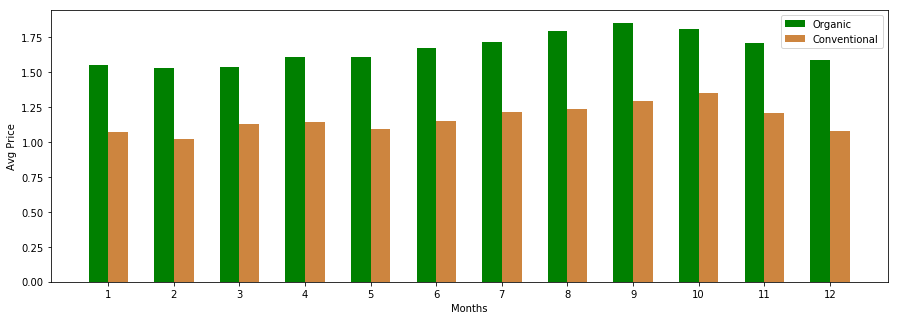

In [61]:
#Matplotlib
tempdf=df.copy()
tempdf['month']=tempdf.Date.dt.month
tempdf=tempdf.groupby(['month','type'])['AveragePrice'].mean().reset_index()

t1=tempdf[tempdf.type=='organic']
t1=t1.sort_values(by='month')
t2=tempdf[tempdf.type!='organic']
t2=t2.sort_values(by='month')

#Plotting
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
w = 0.3
plt.xlabel('Months')
plt.ylabel('Avg Price')
ax.bar(t1['month'], t1['AveragePrice'],width=w,color='g',align='center',label='Organic')
ax.bar(t2['month']+0.3, t2['AveragePrice'],width=w,color='peru',align='center',label='Conventional')
ax.set_xticks(t1.month+ w / 2)
ax.set_xticklabels( np.arange(1,13) )
plt.legend()
plt.show()

<Figure size 1080x360 with 0 Axes>

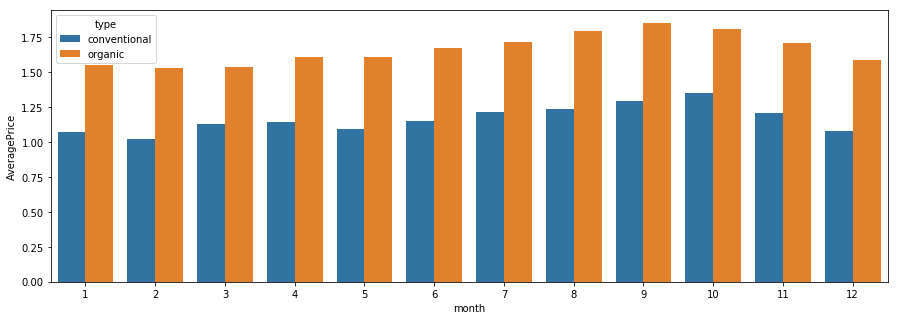

In [59]:
#Seaborn
plt.figure(figsize=(15,5))
sns.barplot(x='month',y='AveragePrice',hue='type',data=tempdf)
plt.show()

Average price of organic throughout the months is also higher than conventional. The variation of sales prices, there is a slight upward trend until the 3rd last month (Sep)

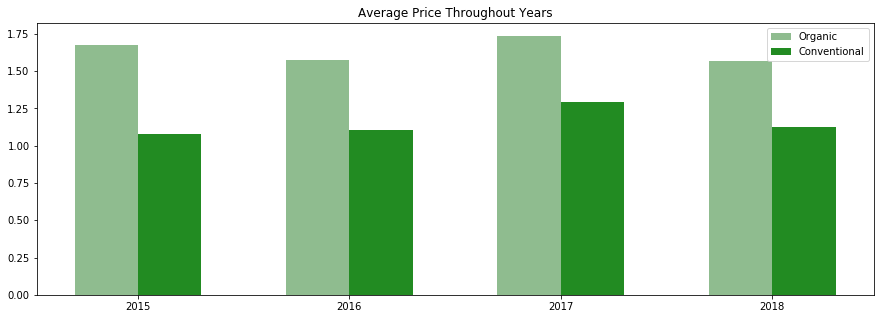

In [66]:
#Matplotlib
tempdf=df.copy()
tempdf=tempdf.groupby(['year','type'])['AveragePrice'].mean().reset_index()

t1=tempdf[tempdf.type=='organic']
t1=t1.sort_values(by='year')
t2=tempdf[tempdf.type!='organic']
t2=t2.sort_values(by='year')

#Plotting
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
w = 0.3
plt.title("Average Price Throughout Years")
ax.bar(t1['year'], t1['AveragePrice'],width=w,color='darkseagreen',align='center',label='Organic')
ax.bar(t2['year']+0.3, t2['AveragePrice'],width=w,color='forestgreen',align='center',label='Conventional')
ax.set_xticks(t1.year+ w / 2)
ax.set_xticklabels( t1.year )
plt.legend()
plt.show()

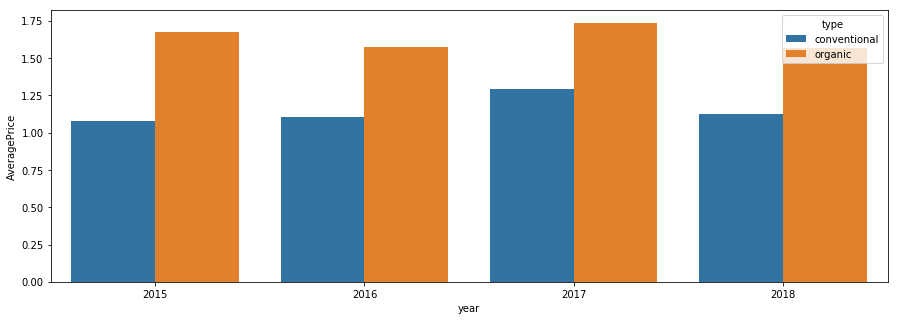

In [67]:
#Seaborn
plt.figure(figsize=(15,5))
sns.barplot(x='year',y='AveragePrice',hue='type',data=tempdf,)
plt.show()

The variation in price throughout the years is minor. The Price was the highest in 2017. 